In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('code-sml_5/datafile/Survived.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# 値の分布に偏りがある

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# 欠損値あり

In [9]:
# Age 平均値で埋める
# Cabin 捨てる
# Embarked 最頻値で埋める

In [10]:
df['Embarked'].mode()

0    S
dtype: object

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
# 特徴量
x = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [19]:
# 正解データ
t = df['Survived']
t

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [21]:
model = tree.DecisionTreeClassifier(random_state=0, class_weight='balanced')
# class_weight balanced 不均衡データをうまく処理するため

In [22]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [23]:
model.score(x_test, y_test)

0.6312849162011173

In [24]:
sex = df.groupby('Sex').mean()

In [25]:
sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex'>

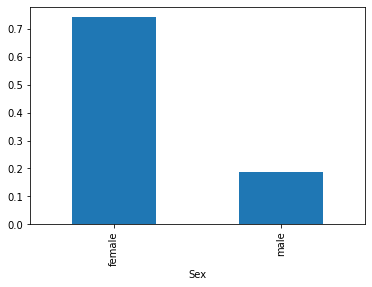

In [26]:
sex['Survived'].plot(kind='bar')

In [27]:
# 女性のほうが生存率が明らかに高い

In [31]:
male = pd.get_dummies(df['Sex'])
male

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
male = pd.get_dummies(df['Sex'], drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
x_temp = pd.concat([x, male], axis=1)
x_temp

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,3,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [35]:
# male列が追加された

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_temp, t, test_size=0.2, random_state=0)
model = tree.DecisionTreeClassifier(random_state=0, class_weight='balanced')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8156424581005587